In [59]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

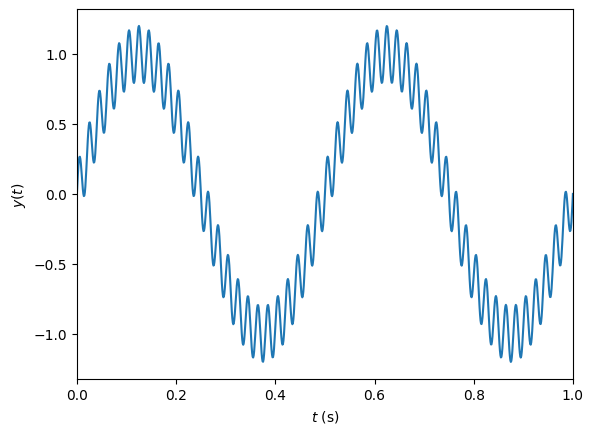

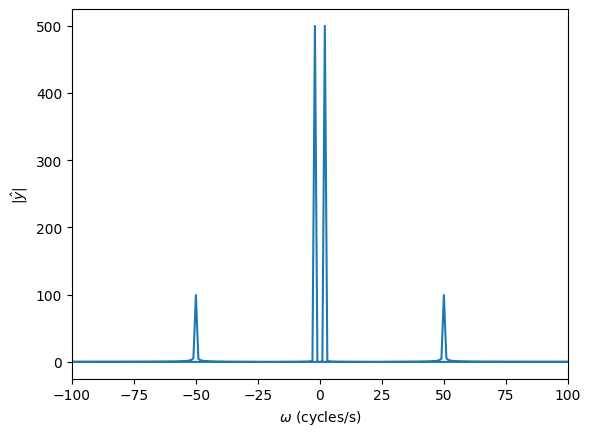

In [60]:
# Generate a signal
samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second
tlims = [0,1]        # in seconds
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

# Plot the signal
plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

# Plot the power spectrum
plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

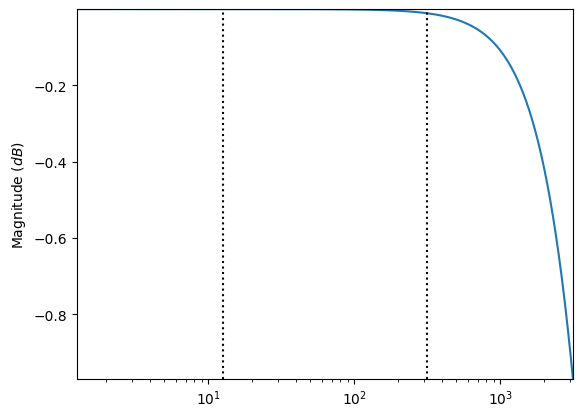

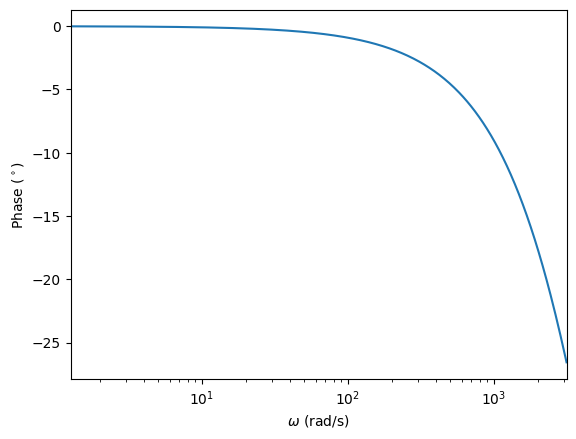

In [61]:
# Low-pass filter
w0 = 2*np.pi*1000; # pole frequency (rad/s)
num = w0        # transfer function numerator coefficients
den = [1,w0]    # transfer function denominator coefficients
lowPass = signal.TransferFunction(num,den) # Transfer function

# Generate the bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)

# Magnitude plot
plt.figure()
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Phase plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()

In [62]:
dt = 1.0/samplingFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.75854699, 0.75854699]),
array([1.        , 0.51709399]),
dt: 0.001
)


Filter coefficients b_i: [0.75854699 0.75854699]
Filter coefficients a_i: [-0.51709399]


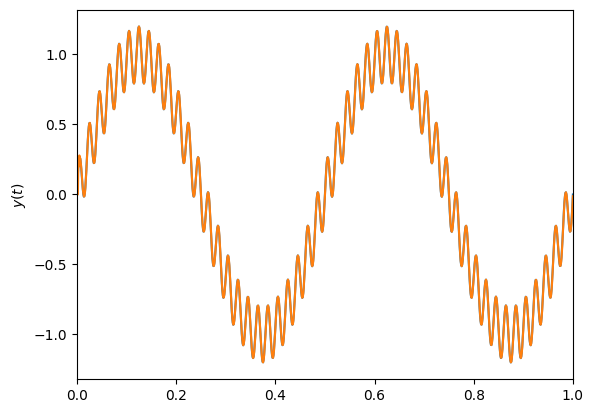

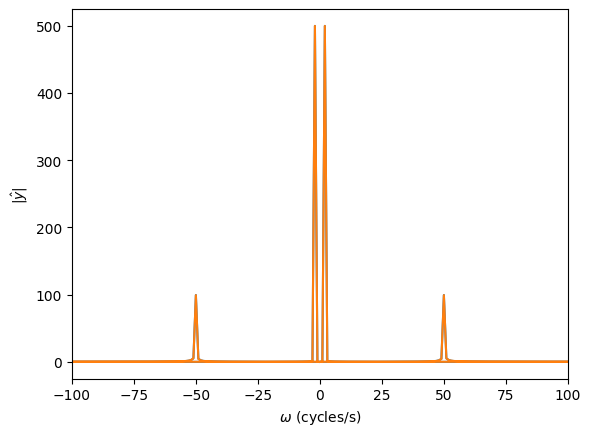

In [63]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Filter the signal
yfilt = np.zeros(len(y));
for i in range(3,len(y)):
    yfilt[i] = a[1]*yfilt[i-1] + b[0]*y[i] + b[1]*y[i-1];
    
# Plot the signal
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);

# Generate Fourier transform
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.plot(fcycles,np.absolute(yfilthat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

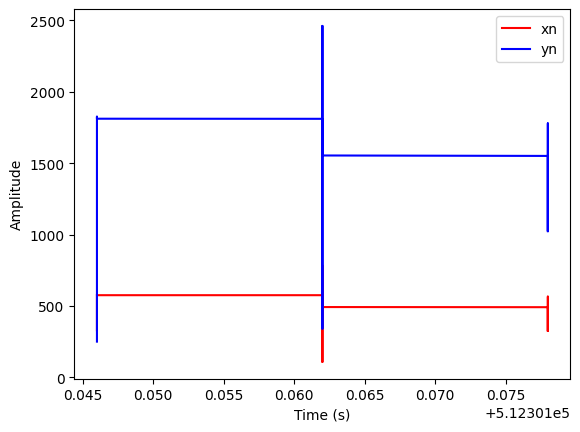

In [64]:
import math
import time
import csv
import matplotlib.pyplot as plt

xn1 = 0
yn1 = 0
xn_list = []
yn_list = []
time_list = []

b = [0.75854699, 0.75854699]
a = [1, -0.51709399]

# Open the CSV file
with open('C:/Users/Asus/OneDrive/Documents/Inventor/MetaSensingLight/Testdata/Test3_cal_10.3.csv', 'r') as file:
    reader = csv.reader(file)
    # Skip header row
    next(reader)
    for row in reader:
        # Check if row is not empty
        if row:
            # Extract the input signal from the desired column
            xn = float(row[0])
            # Compute the filtered signal
            yn = b[0]*xn + b[1]*xn1 - a[1]*yn1

            xn1 = xn
            yn1 = yn

            xn_list.append(xn)
            yn_list.append(yn)
            time_list.append(time.monotonic())


# Plot
plt.plot(time_list, xn_list, 'r', label='xn')
plt.plot(time_list, yn_list, 'b', label='yn')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()
